In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('fede'))
if module_path not in sys.path:
    sys.path.append(module_path)
from client import Client
from supported_modles import Supported_modles
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
import numpy as np

In [2]:
selected_model = Supported_modles.NN_classifier
client1 = Client("node1","0.0.0.0", 5001, selected_model)
dataset = client1.load_data('datasets/Wednesday-workingHours.pcap_ISCX.csv', True)

Creating node1.


In [4]:
client1.preprocess_data(dataset, True)

In [74]:
model = LogisticRegression()
# fit the model
model.fit(client1.x, client1.y)

/home/tk/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature: {client1.feature_names[i]}, Score: {v}')

Feature: Destination Port, Score: -29.5695977130571
Feature: Flow Duration, Score: -1.0014575262939782
Feature: Total Fwd Packets, Score: -3.785882093791133
Feature: Total Backward Packets, Score: -7.686010851928562
Feature: Total Length of Fwd Packets, Score: -0.3821569476945202
Feature: Total Length of Bwd Packets, Score: 2.205336449064758
Feature: Fwd Packet Length Max, Score: -1.5824690908551688
Feature: Fwd Packet Length Min, Score: 10.367762715966435
Feature: Fwd Packet Length Mean, Score: 0.6823913055022466
Feature: Fwd Packet Length Std, Score: -0.05559118628117568
Feature: Bwd Packet Length Max, Score: 4.09670428026753
Feature: Bwd Packet Length Min, Score: -12.859228924306574
Feature: Bwd Packet Length Mean, Score: -1.8095529979943539
Feature: Bwd Packet Length Std, Score: 0.48501690874145065
Feature: Flow Bytes/s, Score: -3.2477597986429805
Feature: Flow Packets/s, Score: 5.0734917027999
Feature: Flow IAT Mean, Score: 1.0198994535441517
Feature: Flow IAT Std, Score: 0.597074

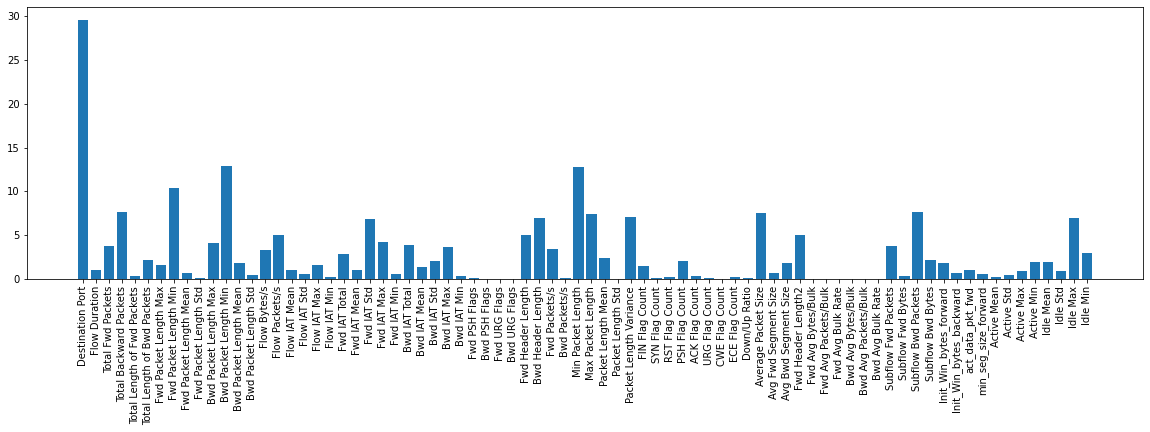

In [26]:
# plot feature importance
pyplot.rcParams["figure.figsize"] = (20,5)
pyplot.bar(client1.feature_names,abs(importance))
pyplot.xticks(rotation = 90)
pyplot.show()

In [27]:
len(importance)

78

In [28]:
len(client1.feature_names)

78

In [6]:
dataset = client1.load_data('../../datasets/UNSW_NB15_train-set.csv')
client1.preprocess_data(dataset)
client1.prep_data()
model = LogisticRegression()
# fit the model
model.fit(client1.x, client1.y)

/home/tk/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature: {client1.feature_names[i]}, Score: {v}')

Feature: dur, Score: 0.04968216958129226
Feature: spkts, Score: -0.16103867846771522
Feature: dpkts, Score: 4.567692838487536
Feature: sbytes, Score: -1.7806146966797318
Feature: dbytes, Score: -3.711184599122445
Feature: rate, Score: -0.10516783971695084
Feature: sttl, Score: 1.2538250674657383
Feature: dttl, Score: 17.70199988485717
Feature: sload, Score: 0.07018233144331991
Feature: dload, Score: -8.67594698913383
Feature: sloss, Score: 1.7601338727993567
Feature: dloss, Score: -0.7288989665895714
Feature: sinpkt, Score: -0.43759368394858356
Feature: dinpkt, Score: -0.08892370239610359
Feature: sjit, Score: -0.10289428026826447
Feature: djit, Score: 0.4199222032251481
Feature: swin, Score: -5.263489746619177
Feature: stcpb, Score: -0.00940523385671786
Feature: dtcpb, Score: 0.005989558782027183
Feature: dwin, Score: -3.9783879890091924
Feature: tcprtt, Score: -0.1301080104755051
Feature: synack, Score: -0.33800955818798206
Feature: ackdat, Score: 0.10726598710476605
Feature: smean, 

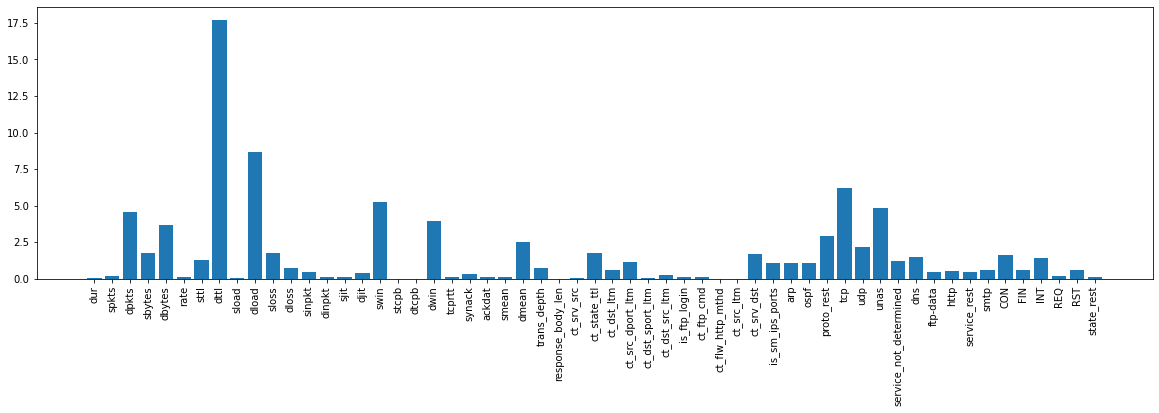

In [8]:
# plot feature importance
pyplot.rcParams["figure.figsize"] = (20,5)
# pyplot.rcParams['figure.dpi'] = 1000
pyplot.bar(client1.feature_names,abs(importance))
pyplot.xticks(rotation = 90)
pyplot.show()